# 1. Library Import

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정



W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


# 2. 데이터 불러오기 및 확인

In [ ]:
df_hitter = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HK/kbo_salary/KBO_Salary/hitter_salary_stats_all.csv')
df_hw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HK/kbo_salary/KBO_Salary/Height_Weight.csv')

In [ ]:
sw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HK/kbo_salary/KBO_Salary/Salary_WAR.csv')

In [ ]:
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4205 entries, 0 to 4204
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수      4205 non-null   object 
 1   연도      4205 non-null   int64  
 2   팀       4205 non-null   object 
 3   연봉(만원)  4205 non-null   object 
 4   WAR     4205 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 164.4+ KB


In [ ]:
sw[sw['선수'] == '양의지']

,선수,연도,팀,연봉(만원),WAR
585,양의지,2020,NC,"200,000",6.63
1415,양의지,2021,NC,"150,000",5.51
2259,양의지,2022,NC,"100,000",5.31
2684,양의지,2023,두산,"30,000",6.10
3559,양의지,2024,두산,"50,000",2.66


In [ ]:
df_runners = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HK/kbo_salary/KBO_Salary/runner.csv')

In [ ]:
df_defense = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HK/kbo_salary/KBO_Salary/defense.csv')


In [ ]:
df_hitter.shape

(818, 31)

In [ ]:
df_hitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      818 non-null    int64  
 1   선수명     818 non-null    object 
 2   팀명      818 non-null    object 
 3   AVG     818 non-null    float64
 4   G       818 non-null    int64  
 5   PA      818 non-null    int64  
 6   AB      818 non-null    int64  
 7   R       818 non-null    int64  
 8   H       818 non-null    int64  
 9   2B      818 non-null    int64  
 10  3B      818 non-null    int64  
 11  HR      818 non-null    int64  
 12  TB      818 non-null    int64  
 13  RBI     818 non-null    int64  
 14  SAC     818 non-null    int64  
 15  SF      818 non-null    int64  
 16  BB      818 non-null    int64  
 17  IBB     818 non-null    int64  
 18  HBP     818 non-null    int64  
 19  SO      818 non-null    int64  
 20  GDP     818 non-null    int64  
 21  SLG     818 non-null    float64
 22  OB

In [ ]:
df_hitter = df_hitter.drop(['순위'], axis=1)

In [ ]:
df_runners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      1842 non-null   int64 
 1   선수명     1842 non-null   object
 2   팀명      1842 non-null   object
 3   G       1842 non-null   int64 
 4   SBA     1842 non-null   int64 
 5   SB      1842 non-null   int64 
 6   CS      1842 non-null   int64 
 7   SB%     1842 non-null   object
 8   OOB     1842 non-null   int64 
 9   PKO     1842 non-null   int64 
 10  연도      1842 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 158.4+ KB


In [ ]:
df_runners['SB%'].replace('-','0',inplace=True)
df_runners['SB%'] = df_runners['SB%'].astype('float')

In [ ]:
df_all_stat = pd.merge(left = df_runners, right = df_hitter ,on = ['선수명','연도','팀명'])
df_all_stat = pd.merge(left = df_defense, right = df_all_stat, on = ['선수명','연도','팀명'])

df_all_stat.shape

(1094, 53)

In [ ]:
df_all_stat

,순위_x,선수명,팀명,POS,G,GS,IP,E,PKO_x,PO,...,GDP,SLG,OBP,OPS,MH,RISP,PH-BA,연봉(만원),WAR,후년연봉
0,2,정은원,한화,2루수,142,137,1192 2/3,13,0,299,...,4,0.335,0.362,0.697,17,0.232,0.333,12000.0,1.07,12000.0
1,3,박해민,삼성,중견수,140,129,1147,2,0,385,...,7,0.415,0.345,0.760,46,0.294,0.600,30000.0,5.48,38000.0
2,621,박해민,삼성,1루수,4,1,15 1/3,0,0,8,...,7,0.415,0.345,0.760,46,0.294,0.600,30000.0,5.48,38000.0
3,5,박세혁,두산,포수,135,128,1071 2/3,8,0,786,...,7,0.364,0.348,0.712,18,0.298,0.077,23200.0,2.07,26000.0
4,6,전준우,롯데,좌익수,134,133,1148,4,0,233,...,21,0.482,0.347,0.829,42,0.272,0.667,50000.0,3.27,50000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,723,김동진,삼성,2루수,2,0,6,0,0,0,...,4,0.320,0.313,0.633,7,0.250,0.333,3300.0,1.04,4500.0
1090,771,김동진,삼성,3루수,1,0,1,0,0,0,...,4,0.320,0.313,0.633,7,0.250,0.333,3300.0,1.04,4500.0
1091,723,이정범,SSG,우익수,2,2,14,1,0,5,...,1,0.172,0.212,0.384,0,0.091,0.000,3000.0,-0.34,3200.0
1092,771,이정범,SSG,좌익수,1,1,4,0,0,0,...,1,0.172,0.212,0.384,0,0.091,0.000,3000.0,-0.34,3200.0


In [ ]:
df_runners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      1842 non-null   int64  
 1   선수명     1842 non-null   object 
 2   팀명      1842 non-null   object 
 3   G       1842 non-null   int64  
 4   SBA     1842 non-null   int64  
 5   SB      1842 non-null   int64  
 6   CS      1842 non-null   int64  
 7   SB%     1842 non-null   float64
 8   OOB     1842 non-null   int64  
 9   PKO     1842 non-null   int64  
 10  연도      1842 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 158.4+ KB


In [ ]:
df_runners

,순위,선수명,팀명,G,SBA,SB,CS,SB%,OOB,PKO,연도
0,1,김성현,SK,144,8,6,2,75.0,5,0,2020
1,1,페르난데스,두산,144,3,1,2,33.3,3,0,2020
2,1,박해민,삼성,144,31,24,7,77.4,4,2,2020
3,4,정은원,한화,142,21,14,7,66.7,6,2,2020
4,4,로하스,KT,142,8,4,4,50.0,10,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
1837,318,김서현,한화,1,0,0,0,0.0,0,0,2024
1838,318,박준영,한화,1,0,0,0,0.0,0,0,2024
1839,318,윤대경,한화,1,0,0,0,0.0,0,0,2024
1840,318,이태양,한화,1,0,0,0,0.0,0,0,2024


In [ ]:
df_runners.drop('순위',axis=1,inplace=True)

In [ ]:
df_hw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   선수명     223 non-null    object
 1   팀명      223 non-null    object
 2   height  223 non-null    int64 
 3   weight  223 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.1+ KB


In [ ]:
df_hw.head()

,선수명,팀명,height,weight
0,김규성,KIA,183,73
1,한승택,KIA,174,83
2,김도영,KIA,183,85
3,한준수,KIA,184,95
4,이우성,KIA,182,95


In [ ]:
df_hw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   선수명     223 non-null    object
 1   팀명      223 non-null    object
 2   height  223 non-null    int64 
 3   weight  223 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.1+ KB


## 2.2. 컬럼 추가

OPS+: (출루율/리그평균출루율 + 장타율/리그평균장타율 -1)*100/파크팩터  
$( PF(Park Factor) = 100 * ( \frac{\frac{homeRS+homeRA}{homeG}}{ \frac{roadRS+roadRA}{roadG}} ) )$

In [74]:
df_pf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HK/kbo_salary/KBO_Salary/pitcher_meanERA_parkfactor.csv')

df_pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   순위              444 non-null    int64  
 1   선수명             444 non-null    object 
 2   팀명              444 non-null    object 
 3   ERA             444 non-null    float64
 4   G               444 non-null    int64  
 5   W               444 non-null    int64  
 6   L               444 non-null    int64  
 7   SV              444 non-null    int64  
 8   HLD             444 non-null    int64  
 9   WPCT            444 non-null    float64
 10  IP              444 non-null    float64
 11  H               444 non-null    float64
 12  HR              444 non-null    int64  
 13  BB              444 non-null    int64  
 14  HBP             444 non-null    int64  
 15  SO              444 non-null    int64  
 16  R               444 non-null    int64  
 17  ER              444 non-null    int

In [77]:
 df_pf = df_pf[['연도','팀명','park_factor']].drop_duplicates().reset_index()

In [79]:
league = {
    '리그평균출루율' : [0.349,0.346,0.333,0.338],
    '리그평균장타율' : [0.409,0.383,0.379,0.374],
    '연도' : [2020, 2021, 2022, 2023]
}

df_league = pd.DataFrame(league)

# 3. EDA

### 3.1. 키, 몸무게와 관계있는 stat 살펴보기

In [ ]:
df_2023 = df_hitter.loc[df_hitter['연도'] == 2023]

In [ ]:
df_2023.columns

Index(['선수명', '팀명', 'AVG', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SAC', 'SF', 'BB', 'IBB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP',
       'OPS', 'MH', 'RISP', 'PH-BA', '연도', '연봉(만원)', 'WAR', '후년연봉'],
      dtype='object')

In [ ]:
df_hw.columns

Index(['선수명', '팀명', 'height', 'weight'], dtype='object')

In [ ]:
df = pd.merge(left = df_2023, right = df_hw )

In [ ]:
df_2023.shape

(217, 30)

In [ ]:
df_hw.shape

(223, 4)

In [ ]:
df

,선수명,팀명,AVG,G,PA,AB,R,H,2B,3B,...,OPS,MH,RISP,PH-BA,연도,연봉(만원),WAR,후년연봉,height,weight
0,소크라테스,KIA,0.285,142,608,547,91,156,31,3,...,0.807,41,0.303,0.000,2023,50000.0,4.60,50000.0,188,93
1,박찬호,KIA,0.301,130,507,452,73,136,18,4,...,0.734,42,0.355,0.000,2023,20000.0,4.71,30000.0,178,72
2,이우성,KIA,0.301,126,400,355,39,107,17,0,...,0.780,24,0.320,0.500,2023,5500.0,2.66,13000.0,182,95
3,최형우,KIA,0.302,121,508,431,64,130,27,1,...,0.887,35,0.317,0.667,2023,90000.0,3.93,100000.0,180,106
4,김선빈,KIA,0.320,119,473,419,41,134,16,0,...,0.739,36,0.333,0.000,2023,45000.0,2.69,60000.0,165,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,장진혁,한화,0.222,68,178,162,24,36,5,1,...,0.552,6,0.229,0.364,2023,6000.0,-0.44,5800.0,184,90
157,최인호,한화,0.298,41,148,131,23,39,5,3,...,0.790,10,0.240,0.250,2023,3800.0,1.49,4800.0,178,82
158,유로결,한화,0.146,27,53,48,5,7,1,0,...,0.340,1,0.125,0.000,2023,3300.0,-0.45,3300.0,186,83
159,하주석,한화,0.114,25,38,35,4,4,1,0,...,0.327,0,0.167,0.200,2023,10000.0,-0.58,7000.0,185,92


In [ ]:
df_r_2023 = df_runners.loc[df_runners['연도'] == 2023]

df_all = pd.merge(left = df, right = df_r_2023, on=['선수명','팀명','연도'])


In [ ]:
df_all

,선수명,팀명,AVG,G_x,PA,AB,R,H,2B,3B,...,후년연봉,height,weight,G_y,SBA,SB,CS,SB%,OOB,PKO
0,소크라테스,KIA,0.285,142,608,547,91,156,31,3,...,50000.0,188,93,127,19,12,7,63.2,5,1
1,박찬호,KIA,0.301,130,507,452,73,136,18,4,...,30000.0,178,72,130,50,42,8,84.0,7,0
2,이우성,KIA,0.301,126,400,355,39,107,17,0,...,13000.0,182,95,80,4,1,3,25.0,1,1
3,최형우,KIA,0.302,121,508,431,64,130,27,1,...,100000.0,180,106,132,1,1,0,100.0,3,1
4,김선빈,KIA,0.320,119,473,419,41,134,16,0,...,60000.0,165,77,140,15,13,2,86.7,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,박상언,한화,0.200,86,161,145,13,29,5,1,...,4200.0,185,90,56,3,0,3,0.0,0,0
110,이원석,한화,0.190,81,138,116,20,22,1,1,...,3600.0,177,69,20,0,0,0,0.0,0,0
111,장진혁,한화,0.222,68,178,162,24,36,5,1,...,5800.0,184,90,41,3,2,1,66.7,1,0
112,유로결,한화,0.146,27,53,48,5,7,1,0,...,3300.0,186,83,30,0,0,0,0.0,2,0


In [ ]:
df_all.columns

Index(['선수명', '팀명', 'AVG', 'G_x', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SAC', 'SF', 'BB', 'IBB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP',
       'OPS', 'MH', 'RISP', 'PH-BA', '연도', '연봉(만원)', 'WAR', '후년연봉', 'height',
       'weight', 'G_y', 'SBA', 'SB', 'CS', 'SB%', 'OOB', 'PKO'],
      dtype='object')

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     114 non-null    object 
 1   팀명      114 non-null    object 
 2   AVG     114 non-null    float64
 3   G_x     114 non-null    int64  
 4   PA      114 non-null    int64  
 5   AB      114 non-null    int64  
 6   R       114 non-null    int64  
 7   H       114 non-null    int64  
 8   2B      114 non-null    int64  
 9   3B      114 non-null    int64  
 10  HR      114 non-null    int64  
 11  TB      114 non-null    int64  
 12  RBI     114 non-null    int64  
 13  SAC     114 non-null    int64  
 14  SF      114 non-null    int64  
 15  BB      114 non-null    int64  
 16  IBB     114 non-null    int64  
 17  HBP     114 non-null    int64  
 18  SO      114 non-null    int64  
 19  GDP     114 non-null    int64  
 20  SLG     114 non-null    float64
 21  OBP     114 non-null    float64
 22  OP

In [ ]:
sns.set_style("darkgrid")

## 3.1.1 키

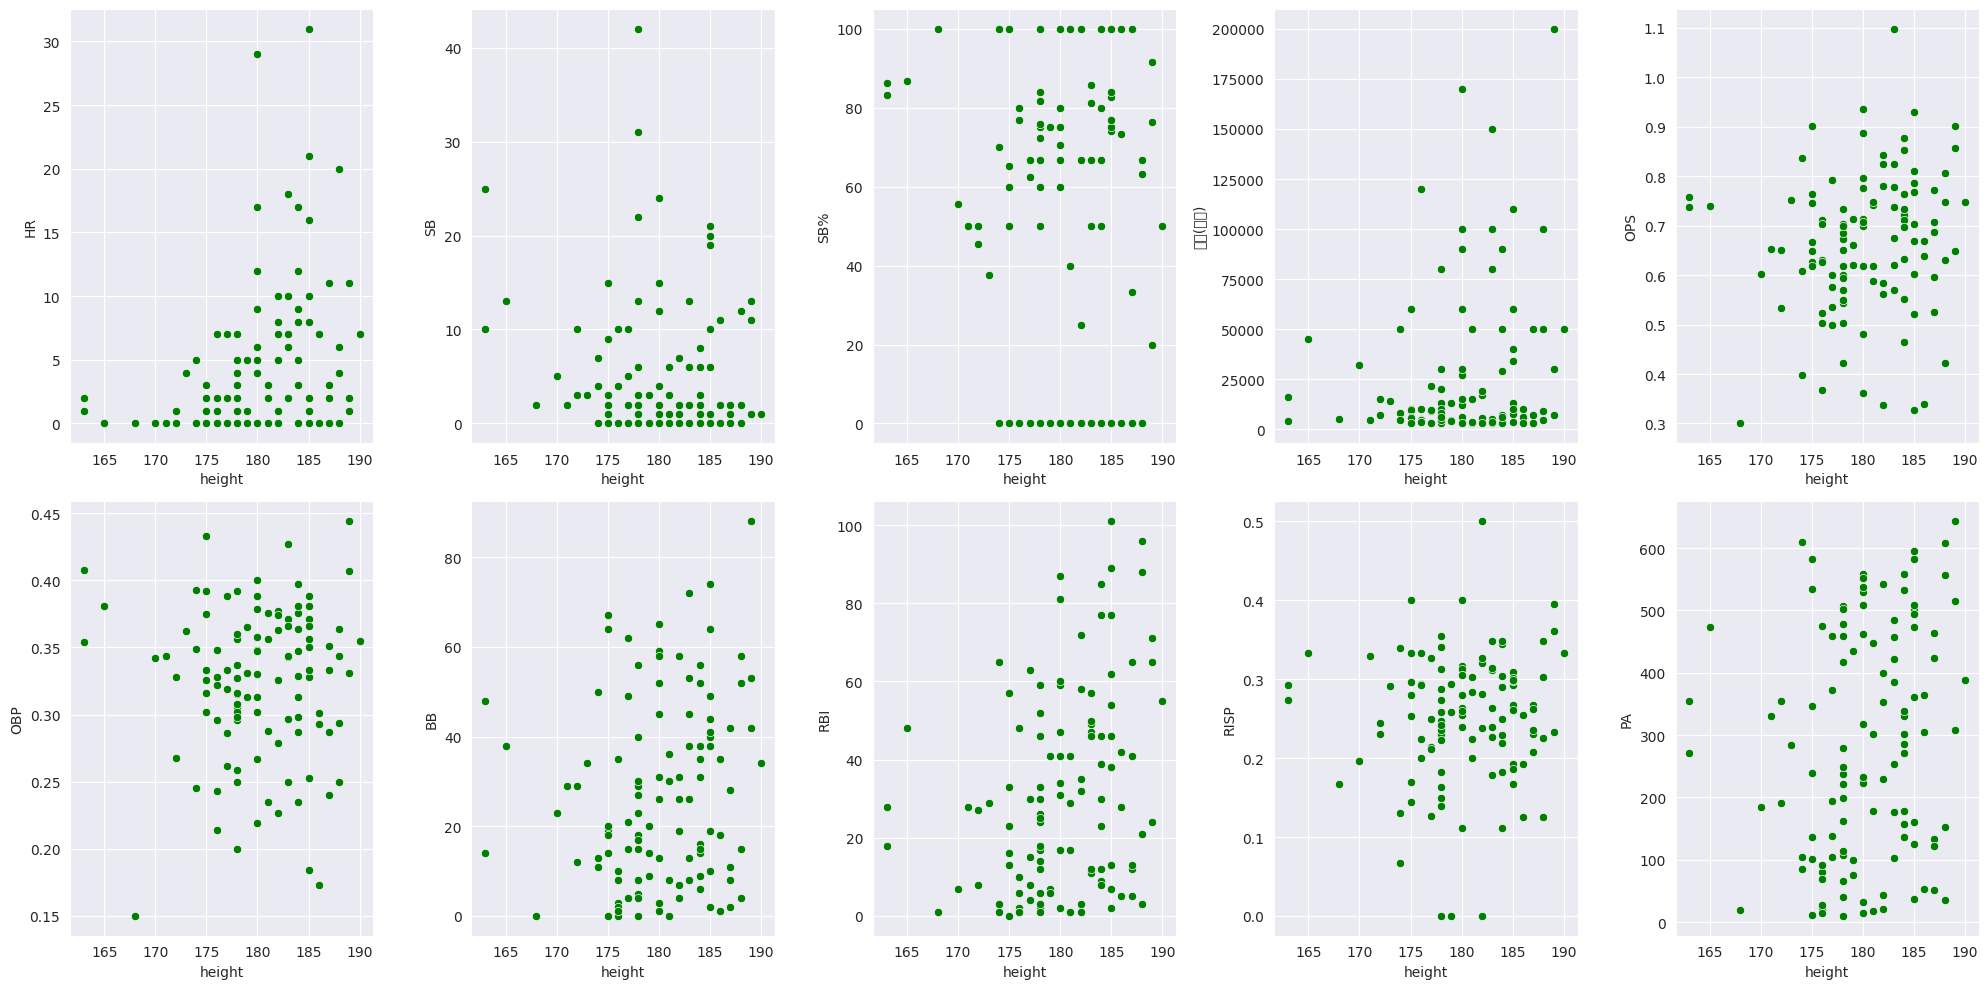

In [ ]:
col_n = 5
row_n = 2
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))
df_eda = df_all[['HR','SB','SB%','연봉(만원)','OPS','OBP','BB','RBI','RISP','PA','height']]
for i, col in enumerate(df_eda.columns[:-1]):
  sns.scatterplot(y=df_eda[col],x=df_eda['height'],ax=ax[int(i/col_n),int(i%col_n)],color='green')
plt.tight_layout()


Text(0, 0.5, '연봉')

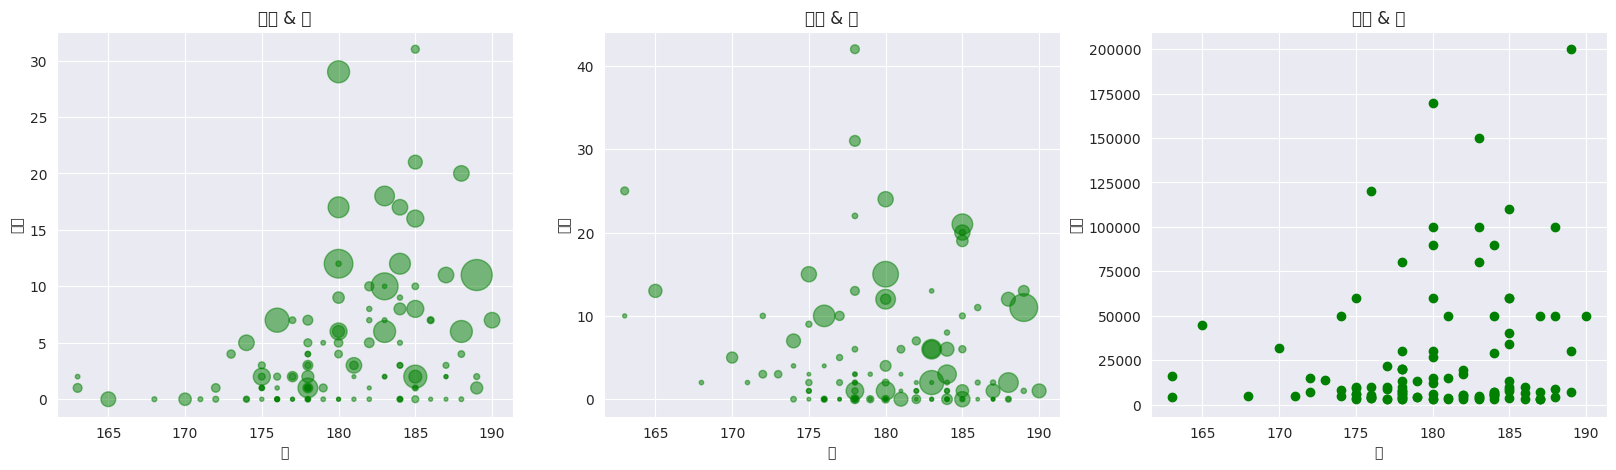

In [ ]:
import numpy as np

col_n = 3
row_n = 1
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))

ax[0].scatter(y=df_all['HR'],x=df_all['height'],s=df_all['연봉(만원)']*0.0025,alpha=0.5, color='green') # 홈런
ax[0].set_title('홈런 & 키')
ax[0].set_xlabel('키')
ax[0].set_ylabel('홈런')

ax[1].scatter(y=df_all['SB'],x=df_all['height'],s=df_all['연봉(만원)']*0.002,alpha=0.5, color='green') # SB
ax[1].set_title('도루 & 키')
ax[1].set_xlabel('키')
ax[1].set_ylabel('도루')

ax[2].scatter(y=df_all['연봉(만원)'],x=df_all['height'],color='green') # 연봉
ax[2].set_title('연봉 & 키')
ax[2].set_xlabel('키')
ax[2].set_ylabel('연봉')
# ax[2].fill([1.9, 1.9, 3.1, 3.1], [1.0, 4.0, 6.0, 3.0], color='lightgray', alpha=0.5)



## 3.1.2 몸무게

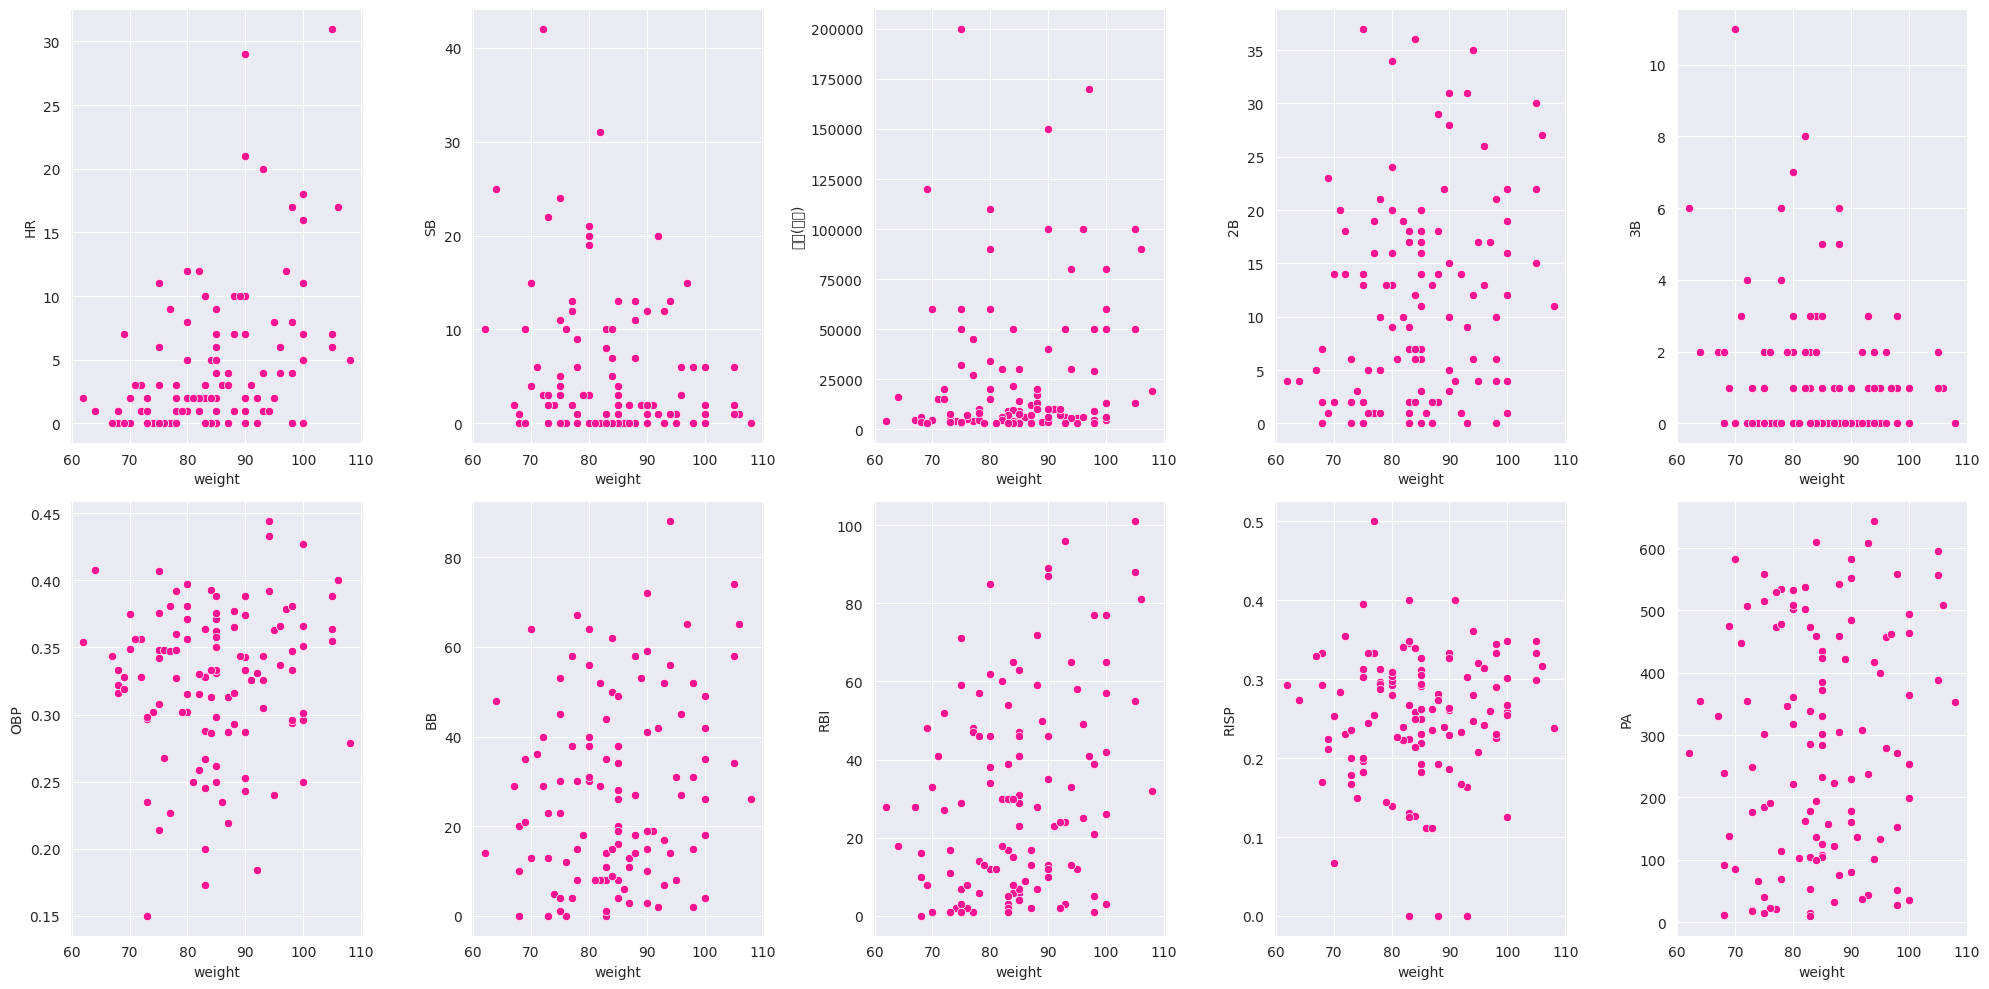

In [ ]:
col_n = 5
row_n = 2
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))
df_eda = df_all[['HR','SB','연봉(만원)','2B','3B','OBP','BB','RBI','RISP','PA','weight']]
for i, col in enumerate(df_eda.columns[:-1]):
  sns.scatterplot(y=df_eda[col],x=df_eda['weight'],ax=ax[int(i/col_n),int(i%col_n)],color='deeppink')
plt.tight_layout()

Text(0, 0.5, '3B')

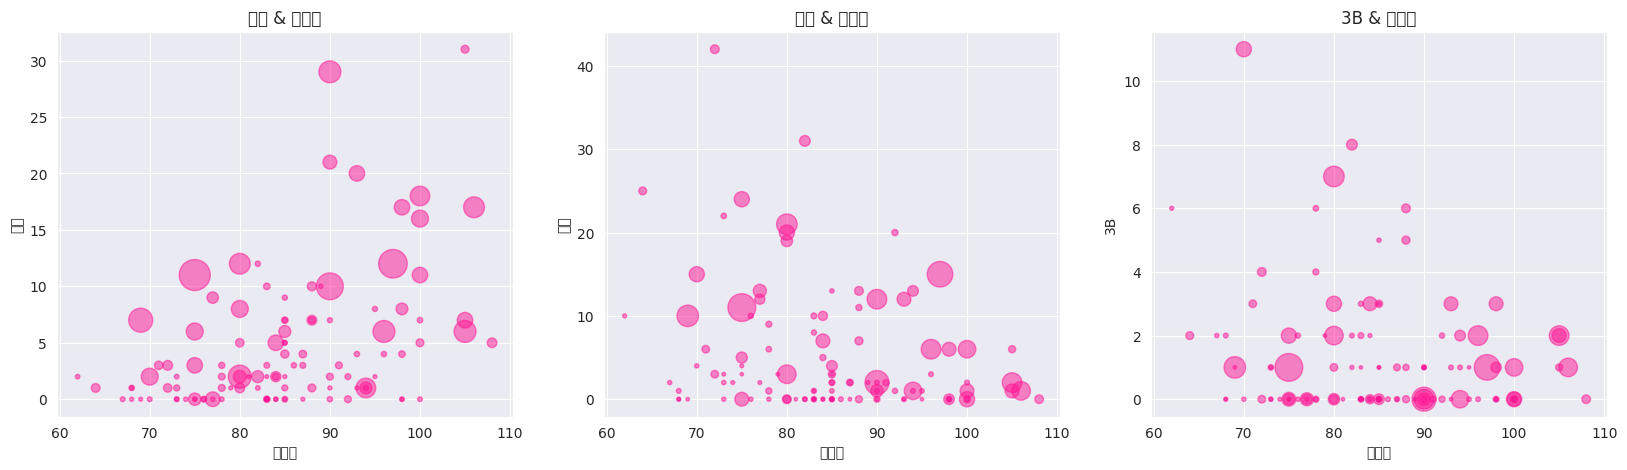

In [ ]:
col_n = 3
row_n = 1
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))

ax[0].scatter(y=df_all['HR'],x=df_all['weight'],s=df_all['연봉(만원)']*0.0025,alpha=0.5, color='deeppink') # 홈런
ax[0].set_title('홈런 & 몸무게')
ax[0].set_xlabel('몸무게')
ax[0].set_ylabel('홈런')

ax[1].scatter(y=df_all['SB'],x=df_all['weight'],s=df_all['연봉(만원)']*0.002,alpha=0.5, color='deeppink') # SB
ax[1].set_title('도루 & 몸무게')
ax[1].set_xlabel('몸무게')
ax[1].set_ylabel('도루')

ax[2].scatter(y=df_all['3B'],x=df_all['weight'],s=df_all['연봉(만원)']*0.002,alpha=0.5,color='deeppink') # 연봉
ax[2].set_title('3B & 몸무게')
ax[2].set_xlabel('몸무게')
ax[2].set_ylabel('3B')



홈런은 힘이 좋아야 하니까 보통 몸무게가 많이 나가는 선수들이 잘하는 편이고  
3루타는 달리기를 잘해야하니까 몸이 가벼운 사람들이 잘하는 편

Text(0, 0.5, '안타')

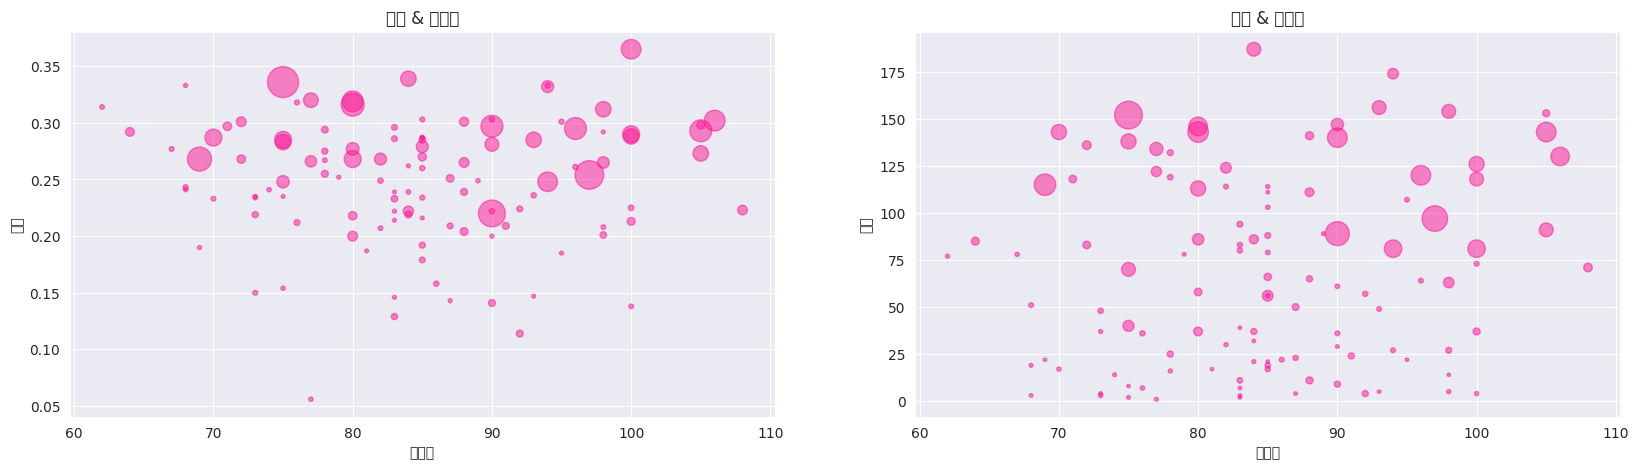

In [ ]:
col_n = 2
row_n = 1
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))

ax[0].scatter(y=df_all['AVG'],x=df_all['weight'],s=df_all['연봉(만원)']*0.0025,alpha=0.5, color='deeppink') # 홈런
ax[0].set_title('타율 & 몸무게')
ax[0].set_xlabel('몸무게')
ax[0].set_ylabel('타율')

ax[1].scatter(y=df_all['H'],x=df_all['weight'],s=df_all['연봉(만원)']*0.002,alpha=0.5, color='deeppink') # SB
ax[1].set_title('안타 & 몸무게')
ax[1].set_xlabel('몸무게')
ax[1].set_ylabel('안타')

# ax[2].scatter(x=df_all['AVG'],y=df_all['H'],s=df_all['연봉(만원)']*0.002,alpha=0.5,color='skyblue') # 연봉
# ax[2].set_title('타율 & 안타')
# ax[2].set_xlabel('타율')
# ax[2].set_ylabel('안타')

## 3.2 팀별 연봉 및 성적

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     114 non-null    object 
 1   팀명      114 non-null    object 
 2   AVG     114 non-null    float64
 3   G_x     114 non-null    int64  
 4   PA      114 non-null    int64  
 5   AB      114 non-null    int64  
 6   R       114 non-null    int64  
 7   H       114 non-null    int64  
 8   2B      114 non-null    int64  
 9   3B      114 non-null    int64  
 10  HR      114 non-null    int64  
 11  TB      114 non-null    int64  
 12  RBI     114 non-null    int64  
 13  SAC     114 non-null    int64  
 14  SF      114 non-null    int64  
 15  BB      114 non-null    int64  
 16  IBB     114 non-null    int64  
 17  HBP     114 non-null    int64  
 18  SO      114 non-null    int64  
 19  GDP     114 non-null    int64  
 20  SLG     114 non-null    float64
 21  OBP     114 non-null    float64
 22  OP

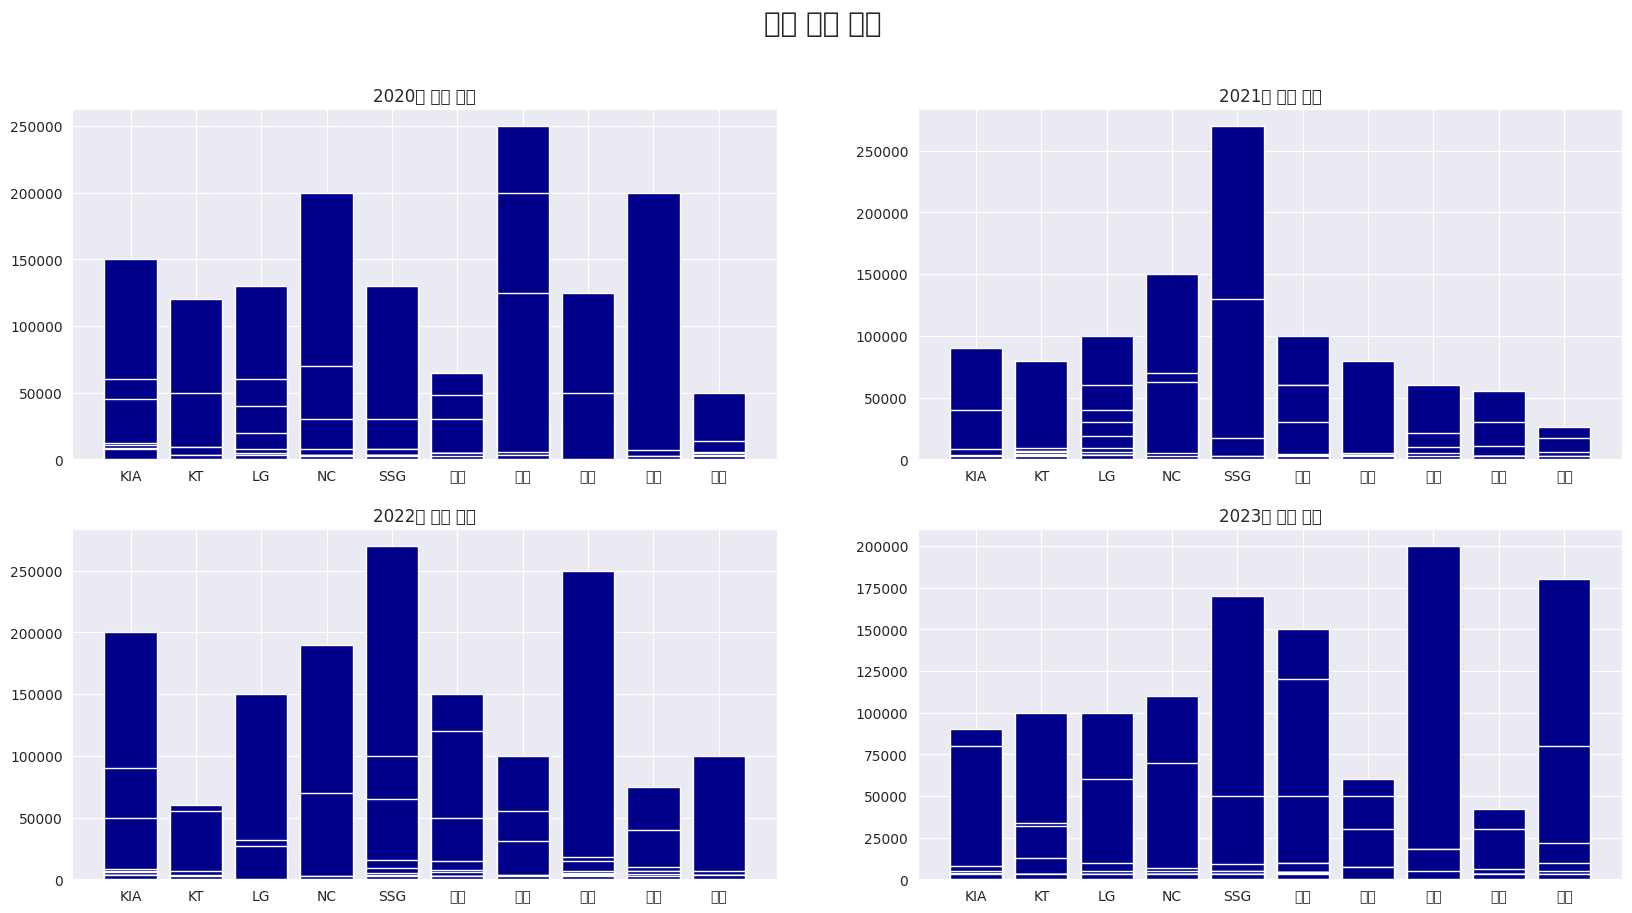

In [ ]:
col_n = 2
row_n = 2
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))

plt.suptitle('팀별 타자 연봉',size='20')
for i in range(0,4):
    df_year = df_hitter.loc[df_hitter['연도'] == 2020+i]
    ax[int(i/2),int(i%2)].bar(df_year['팀명'],df_year['연봉(만원)'],color='darkblue')
    ax[int(i/2),int(i%2)].set_title(f'{2020+i}년 타자 연봉')

In [ ]:
'''
col_n = 2
row_n = 2
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))
plt.suptitle('팀별 홈런 성적',size='20')

for i in range(0,4):
    df_year = df_hitter.loc[df_hitter['연도'] == 2020+i]
    ax[int(i/2),int(i%2)].bar(df_year['팀명'],df_year['HR'],color='darkblue')
    ax[int(i/2),int(i%2)].set_title(f'{2020+i}년 홈런')'''

"\ncol_n = 2\nrow_n = 2\nfig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))\nplt.suptitle('팀별 홈런 성적',size='20')\n\nfor i in range(0,4):\n    df_year = df_hitter.loc[df_hitter['연도'] == 2020+i]\n    ax[int(i/2),int(i%2)].bar(df_year['팀명'],df_year['HR'],color='darkblue')\n    ax[int(i/2),int(i%2)].set_title(f'{2020+i}년 홈런')"

팀별 홈런 총 개수는 직관적으로 와닿지 않기 때문에 1인당 홈런 비율을 구해본다  
팀별로 groupby 진행 후 ,   
팀별 1인당 홈런 비율 = 총 홈런수 / 팀 인원수

In [ ]:
df_hr = df_hitter.groupby(['팀명','연도']).agg({'HR':'sum', '선수명':'count'}).reset_index()
df_hr['홈런비율'] = df_hr['HR'] / df_hr['선수명']
df_hr.head()


,팀명,연도,HR,선수명,홈런비율
0,KIA,2020,126,26,4.846154
1,KIA,2021,46,21,2.190476
2,KIA,2022,93,19,4.894737
3,KIA,2023,100,24,4.166667
4,KT,2020,117,20,5.850000


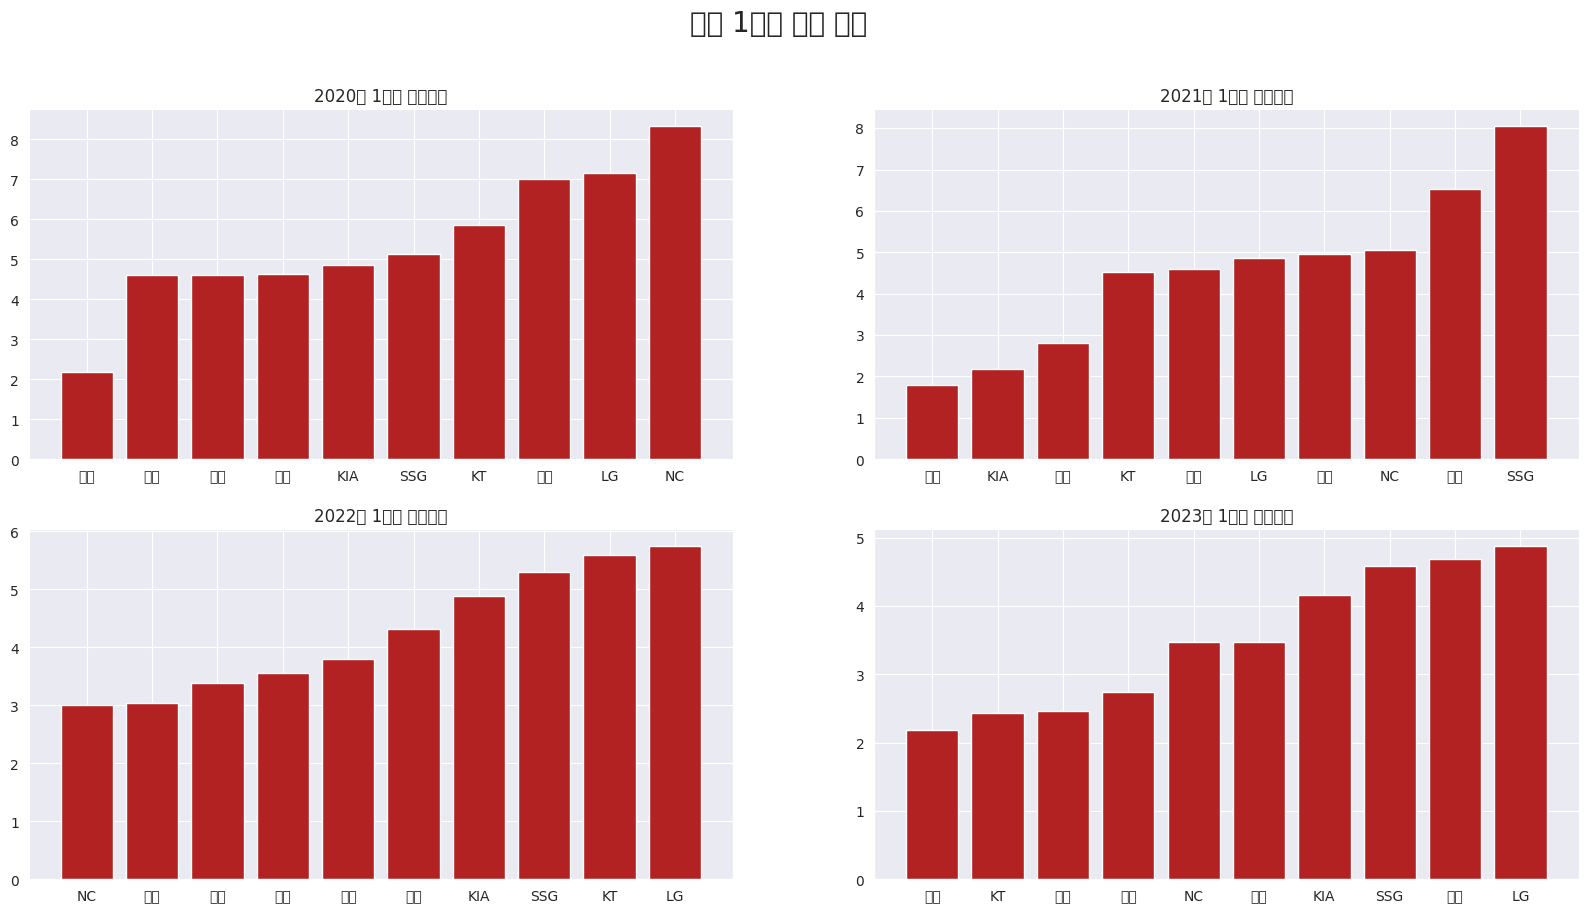

In [ ]:
col_n = 2
row_n = 2
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))
plt.suptitle('팀별 1인당 홈런 비율',size='20')


for i in range(0,4):
    df_year = df_hr.loc[df_hr['연도'] == 2020+i].sort_values('홈런비율')
    ax[int(i/2),int(i%2)].bar(df_year['팀명'],df_year['홈런비율'],color='firebrick')
    ax[int(i/2),int(i%2)].set_title(f'{2020+i}년 1인당 홈런비율')

In [ ]:
df_hitter[df_hitter['선수명'] == '노시환'][['연도','HR','AVG','OPS','WAR','연봉(만원)','후년연봉']]

,연도,HR,AVG,OPS,WAR,연봉(만원),후년연봉
189,2020,12,0.220,0.685,0.39,3300.0,6000.0
384,2021,18,0.271,0.852,4.21,6000.0,12000.0
584,2022,6,0.281,0.737,2.06,12000.0,13100.0
801,2023,31,0.298,0.929,6.82,13100.0,35000.0


# 4. 클러스터링

In [ ]:
df_hitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     818 non-null    object 
 1   팀명      818 non-null    object 
 2   AVG     818 non-null    float64
 3   G       818 non-null    int64  
 4   PA      818 non-null    int64  
 5   AB      818 non-null    int64  
 6   R       818 non-null    int64  
 7   H       818 non-null    int64  
 8   2B      818 non-null    int64  
 9   3B      818 non-null    int64  
 10  HR      818 non-null    int64  
 11  TB      818 non-null    int64  
 12  RBI     818 non-null    int64  
 13  SAC     818 non-null    int64  
 14  SF      818 non-null    int64  
 15  BB      818 non-null    int64  
 16  IBB     818 non-null    int64  
 17  HBP     818 non-null    int64  
 18  SO      818 non-null    int64  
 19  GDP     818 non-null    int64  
 20  SLG     818 non-null    float64
 21  OBP     818 non-null    float64
 22  OP

## 4.1 데이터

In [ ]:
# from sklearn.preprocessing import StandardScaler

df_scaler = df_hitter.drop(['연도','연봉(만원)','후년연봉'],axis=1)
df_scaler = df_scaler.iloc[:,3:]
# scaler = StandardScaler()
# df_scaler.loc[:,:] = scaler.fit_transform(df_scaler)

# df_scaler.head()

In [ ]:
df_scaler

,G,PA,AB,R,H,2B,3B,HR,TB,RBI,...,HBP,SO,GDP,SLG,OBP,OPS,MH,RISP,PH-BA,WAR
0,142,631,542,100,166,40,0,32,302,113,...,9,67,12,0.557,0.398,0.955,44,0.300,0.000,3.46
1,141,531,480,63,107,16,0,3,132,36,...,0,87,14,0.275,0.276,0.551,30,0.185,0.000,-0.77
2,140,600,522,93,185,37,1,28,308,115,...,5,101,9,0.590,0.433,1.023,55,0.374,1.000,6.59
3,137,556,468,73,136,19,1,17,208,92,...,18,114,6,0.444,0.392,0.836,32,0.338,0.250,2.01
4,126,456,391,38,96,23,0,8,143,65,...,6,80,14,0.366,0.341,0.707,15,0.308,0.273,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,27,53,48,5,7,1,0,0,8,5,...,1,10,3,0.167,0.173,0.340,1,0.125,0.000,-0.45
814,25,38,35,4,4,1,0,0,5,2,...,1,10,0,0.143,0.184,0.327,0,0.167,0.200,-0.58
815,14,42,40,2,7,1,0,0,8,5,...,0,9,0,0.200,0.214,0.414,2,0.200,0.000,-0.29
816,7,12,12,1,2,0,0,0,2,0,...,0,8,0,0.167,0.167,0.334,1,0.250,0.000,-0.35


## 4.2 K-means

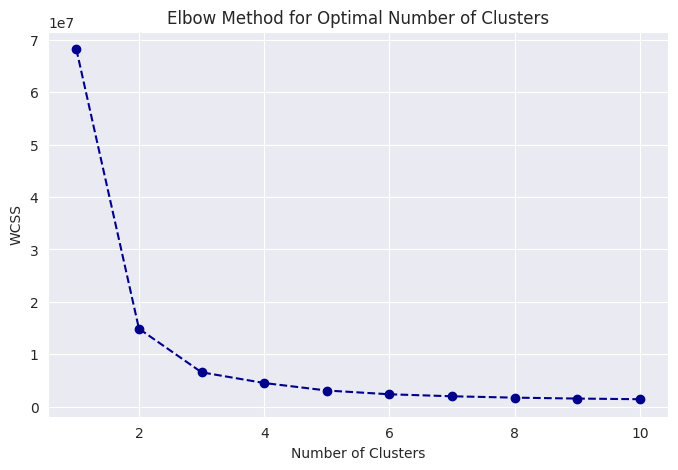

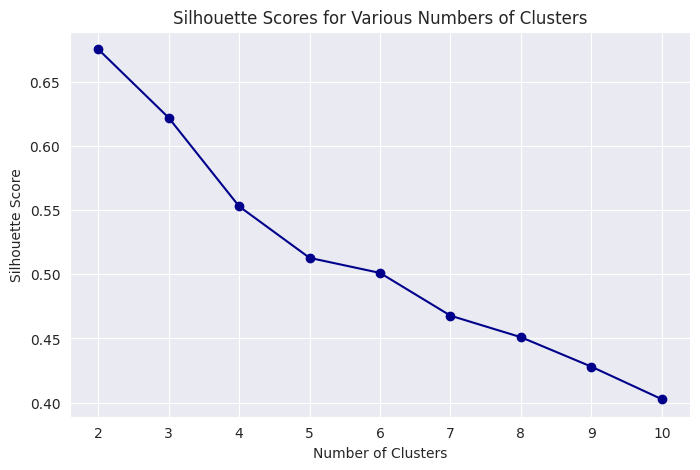

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.pyplot as plt



# Elbow method (엘보우 방법)
wcss = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_scaler)

    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--',color='darkblue')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()




# 실루엣 분석을 사용해 최적의 K값 탐색
silhouette_scores = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(df_scaler)
  score = silhouette_score(df_scaler, kmeans.labels_)
  silhouette_scores.append(score)

# 실루엣 분석 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(range(2,11), silhouette_scores, marker='o',color='darkblue')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


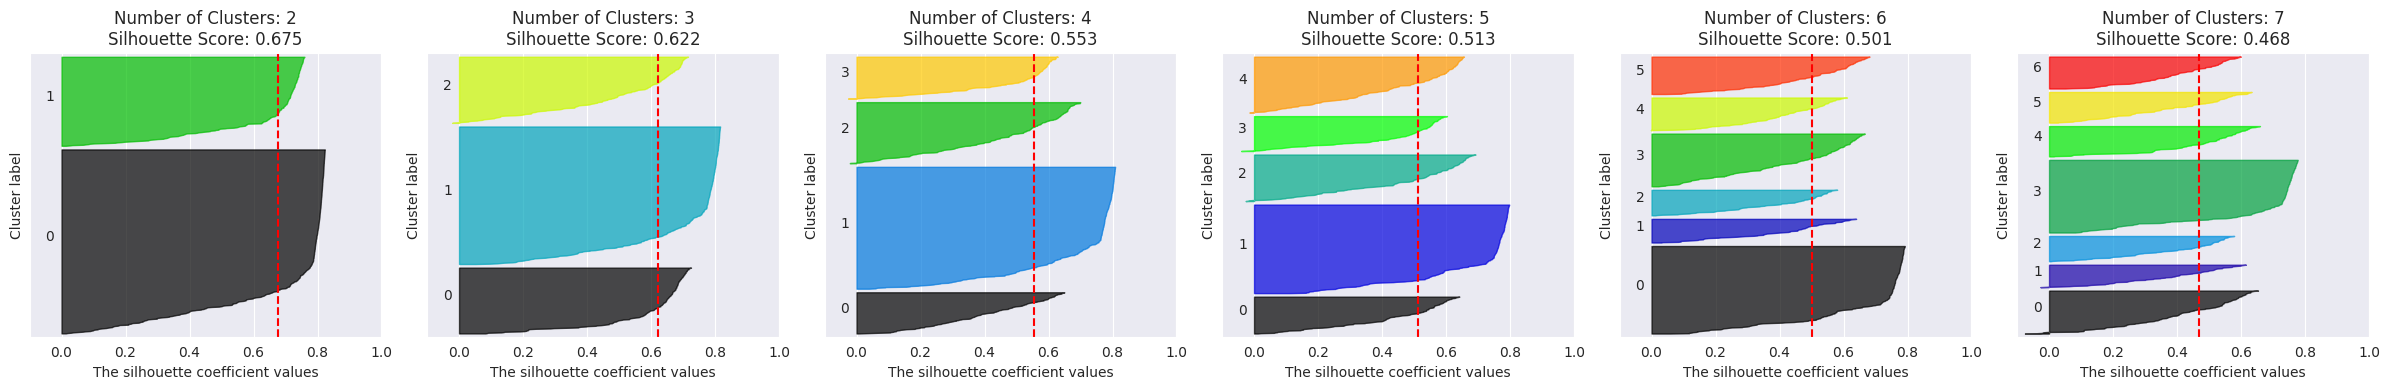

In [ ]:
import matplotlib.cm as cm
import numpy as np
# 클러스터 갯수를 리스트로 받아 실루엣 시각화 함수
def visualize_silhouette_kmeans(cluster_lists, X_features):
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        # KMeans 모델 생성 및 학습
        kmeans = KMeans(n_clusters=n_cluster, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_features)

        # 실루엣 점수 계산
        sil_avg = silhouette_score(X_features, cluster_labels, metric='euclidean')  # 유클리드 거리 사용
        sil_values = silhouette_samples(X_features, cluster_labels, metric='euclidean')  # 유클리드 거리 사용

        y_lower = 10
        axs[ind].set_title(f'Number of Clusters: {n_cluster}\nSilhouette Score: {round(sil_avg, 3)}')
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # y축 레이블 제거
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                   facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

    plt.tight_layout()
    plt.show()

# 실루엣 시각화 함수 호출
visualize_silhouette_kmeans(range(2, 8), df_scaler)

In [ ]:
df_eda

,HR,SB,연봉(만원),2B,3B,OBP,BB,RBI,RISP,PA,weight
0,20,12,50000.0,31,3,0.344,52,96,0.303,608,93
1,3,42,20000.0,18,4,0.356,40,52,0.355,507,72
2,8,1,5500.0,17,0,0.363,31,58,0.320,400,95
3,17,1,90000.0,27,1,0.400,65,81,0.317,508,106
4,0,13,45000.0,16,0,0.381,38,48,0.333,473,77
...,...,...,...,...,...,...,...,...,...,...,...
109,1,0,3600.0,5,1,0.253,10,13,0.186,161,90
110,0,0,3300.0,1,1,0.319,21,8,0.212,138,69
111,0,2,6000.0,5,1,0.287,15,12,0.229,178,90
112,0,0,3300.0,1,0,0.173,1,5,0.125,53,83


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=7)

# kmeans.fit(df_scaler)
cluster_labels = kmeans.fit_predict(df_scaler)
df_hitter['cluster_label'] = cluster_labels

# # # 개별 클러스터의 중심 위치 좌표
centers = kmeans.cluster_centers_



In [ ]:
# 각 cluster의 중앙값

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaler.columns)
centroids['cluster'] = centroids.index

In [ ]:
centroids

,G,PA,AB,R,H,2B,3B,HR,TB,RBI,...,SO,GDP,SLG,OBP,OPS,MH,RISP,PH-BA,WAR,cluster
0,34.522782,56.851319,50.021583,6.827338,10.810552,1.733813,0.160671,0.676259,14.894484,4.884892,...,13.894484,1.134293,0.267005,0.269396,0.536400,1.812950,0.182367,0.162933,-0.019904,0
1,129.305000,519.960000,453.090000,67.750000,129.655000,22.635000,2.045000,12.245000,193.115000,66.440000,...,79.710000,9.800000,0.422980,0.362985,0.785965,34.620000,0.295120,0.257060,3.445750,1
2,90.651741,267.502488,233.582090,30.049751,58.278607,9.815920,0.930348,4.313433,82.895522,27.467662,...,52.681592,5.084577,0.353507,0.324318,0.677826,13.641791,0.248234,0.208592,0.857811,2


In [ ]:
# cluster 중심과의 거리 제곱합 .inertia_
kmeans.inertia_

6550612.526549521

## 4.3 cluster 별 특징 확인

####4.3.1 **연봉상승률 컬럼 추가**  
( 후년연봉  -  현재연봉 )  /  현재연봉

In [ ]:
# 연봉상승률 컬럼 추가

df_cluster = df_hitter.copy()
df_cluster['연봉상승률'] = (df_cluster['후년연봉'] - df_cluster['연봉(만원)']) / df_cluster['연봉(만원)']
df_cluster['연봉상승률'].head()

,연봉상승률
0,0.272727
1,-0.047619
2,-0.400000
3,-0.333333
4,0.750000


In [ ]:
df_hitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   선수명            818 non-null    object 
 1   팀명             818 non-null    object 
 2   AVG            818 non-null    float64
 3   G              818 non-null    int64  
 4   PA             818 non-null    int64  
 5   AB             818 non-null    int64  
 6   R              818 non-null    int64  
 7   H              818 non-null    int64  
 8   2B             818 non-null    int64  
 9   3B             818 non-null    int64  
 10  HR             818 non-null    int64  
 11  TB             818 non-null    int64  
 12  RBI            818 non-null    int64  
 13  SAC            818 non-null    int64  
 14  SF             818 non-null    int64  
 15  BB             818 non-null    int64  
 16  IBB            818 non-null    int64  
 17  HBP            818 non-null    int64  
 18  SO        

<Axes: xlabel='G', ylabel='연봉(만원)'>

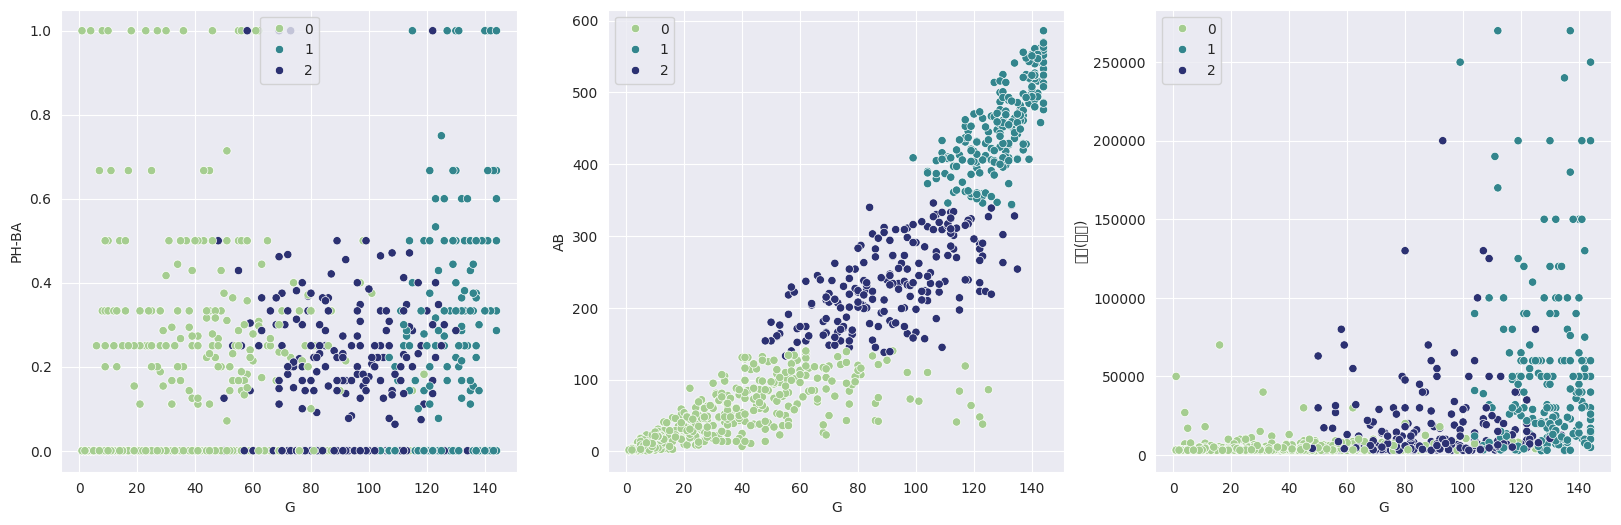

In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
# sns.scatterplot(x=df_hitter['TB'], y=df_hitter['AVG'], data=df_hitter, hue=kmeans.labels_, palette='coolwarm')
sns.scatterplot(x=df_hitter['G'], y=df_hitter['PH-BA'], data=df_hitter, hue=kmeans.labels_, palette='crest')

# plt.ylim([0.2, 0.4])

plt.subplot(132)
sns.scatterplot(x=df_hitter.iloc[:,3], y=df_hitter.iloc[:,5], data=df_hitter, hue=kmeans.labels_, palette='crest')


plt.subplot(133)
sns.scatterplot(x=df_hitter.iloc[:,3], y=df_hitter['연봉(만원)'], data=df_hitter, hue=kmeans.labels_, palette='crest')

cluster 0은 출전하는 선수보다 후보 선수나, 백업요원으로 팀에서 요긴하게 쓰는 선수들과 타격능력은 좋지 않지만 수비능력이 좋아

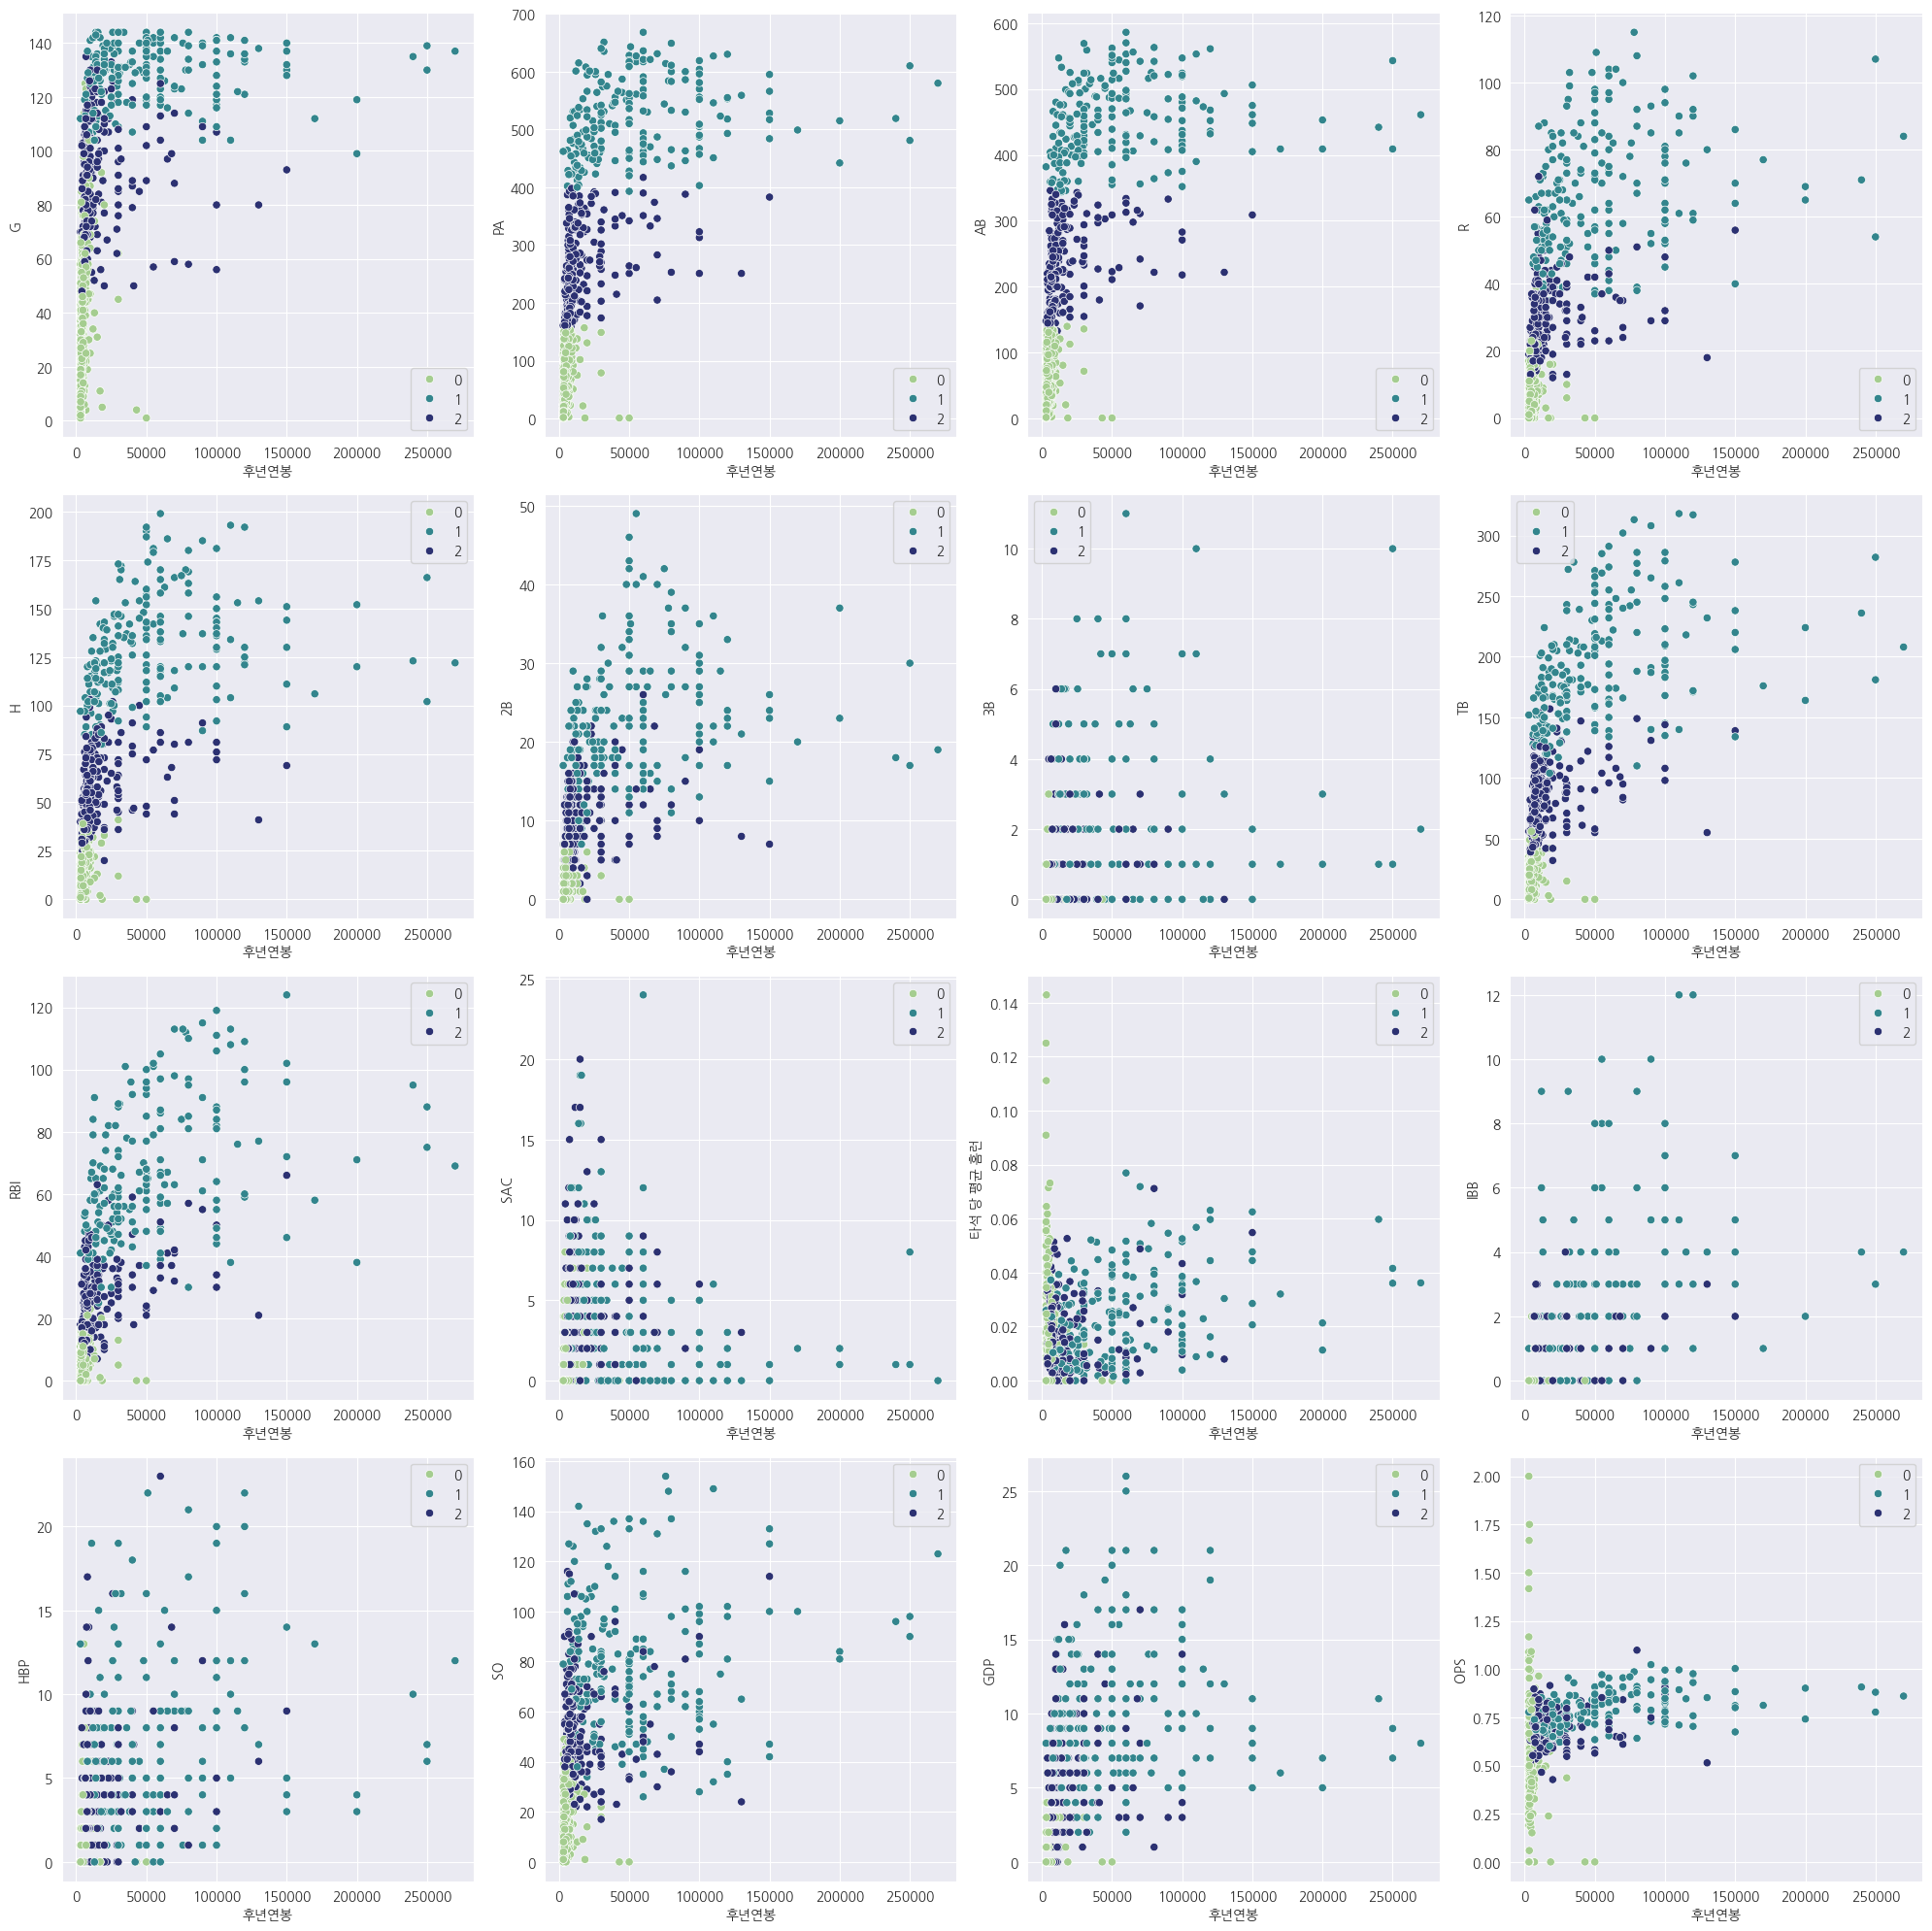

In [ ]:
col_n = 4
row_n = 4
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))
df_hitter['타석 당 평균 볼넷'] = df_hitter['BB'] /df_hitter['PA']
df_hitter['타석 당 평균 홈런'] = df_hitter['HR'] /df_hitter['PA']

df_eda = df_hitter[['G','PA','AB','R','H','2B','3B','TB','RBI','SAC','타석 당 평균 홈런','IBB','HBP','SO','GDP','OPS','후년연봉']]

for i, col in enumerate(df_eda.columns[:-1]):
  sns.scatterplot(x=df_hitter['후년연봉'], y=df_hitter[col], data=df_hitter, hue=kmeans.labels_, palette='crest', ax=ax[int(i/col_n), int(i%col_n)])

plt.tight_layout()

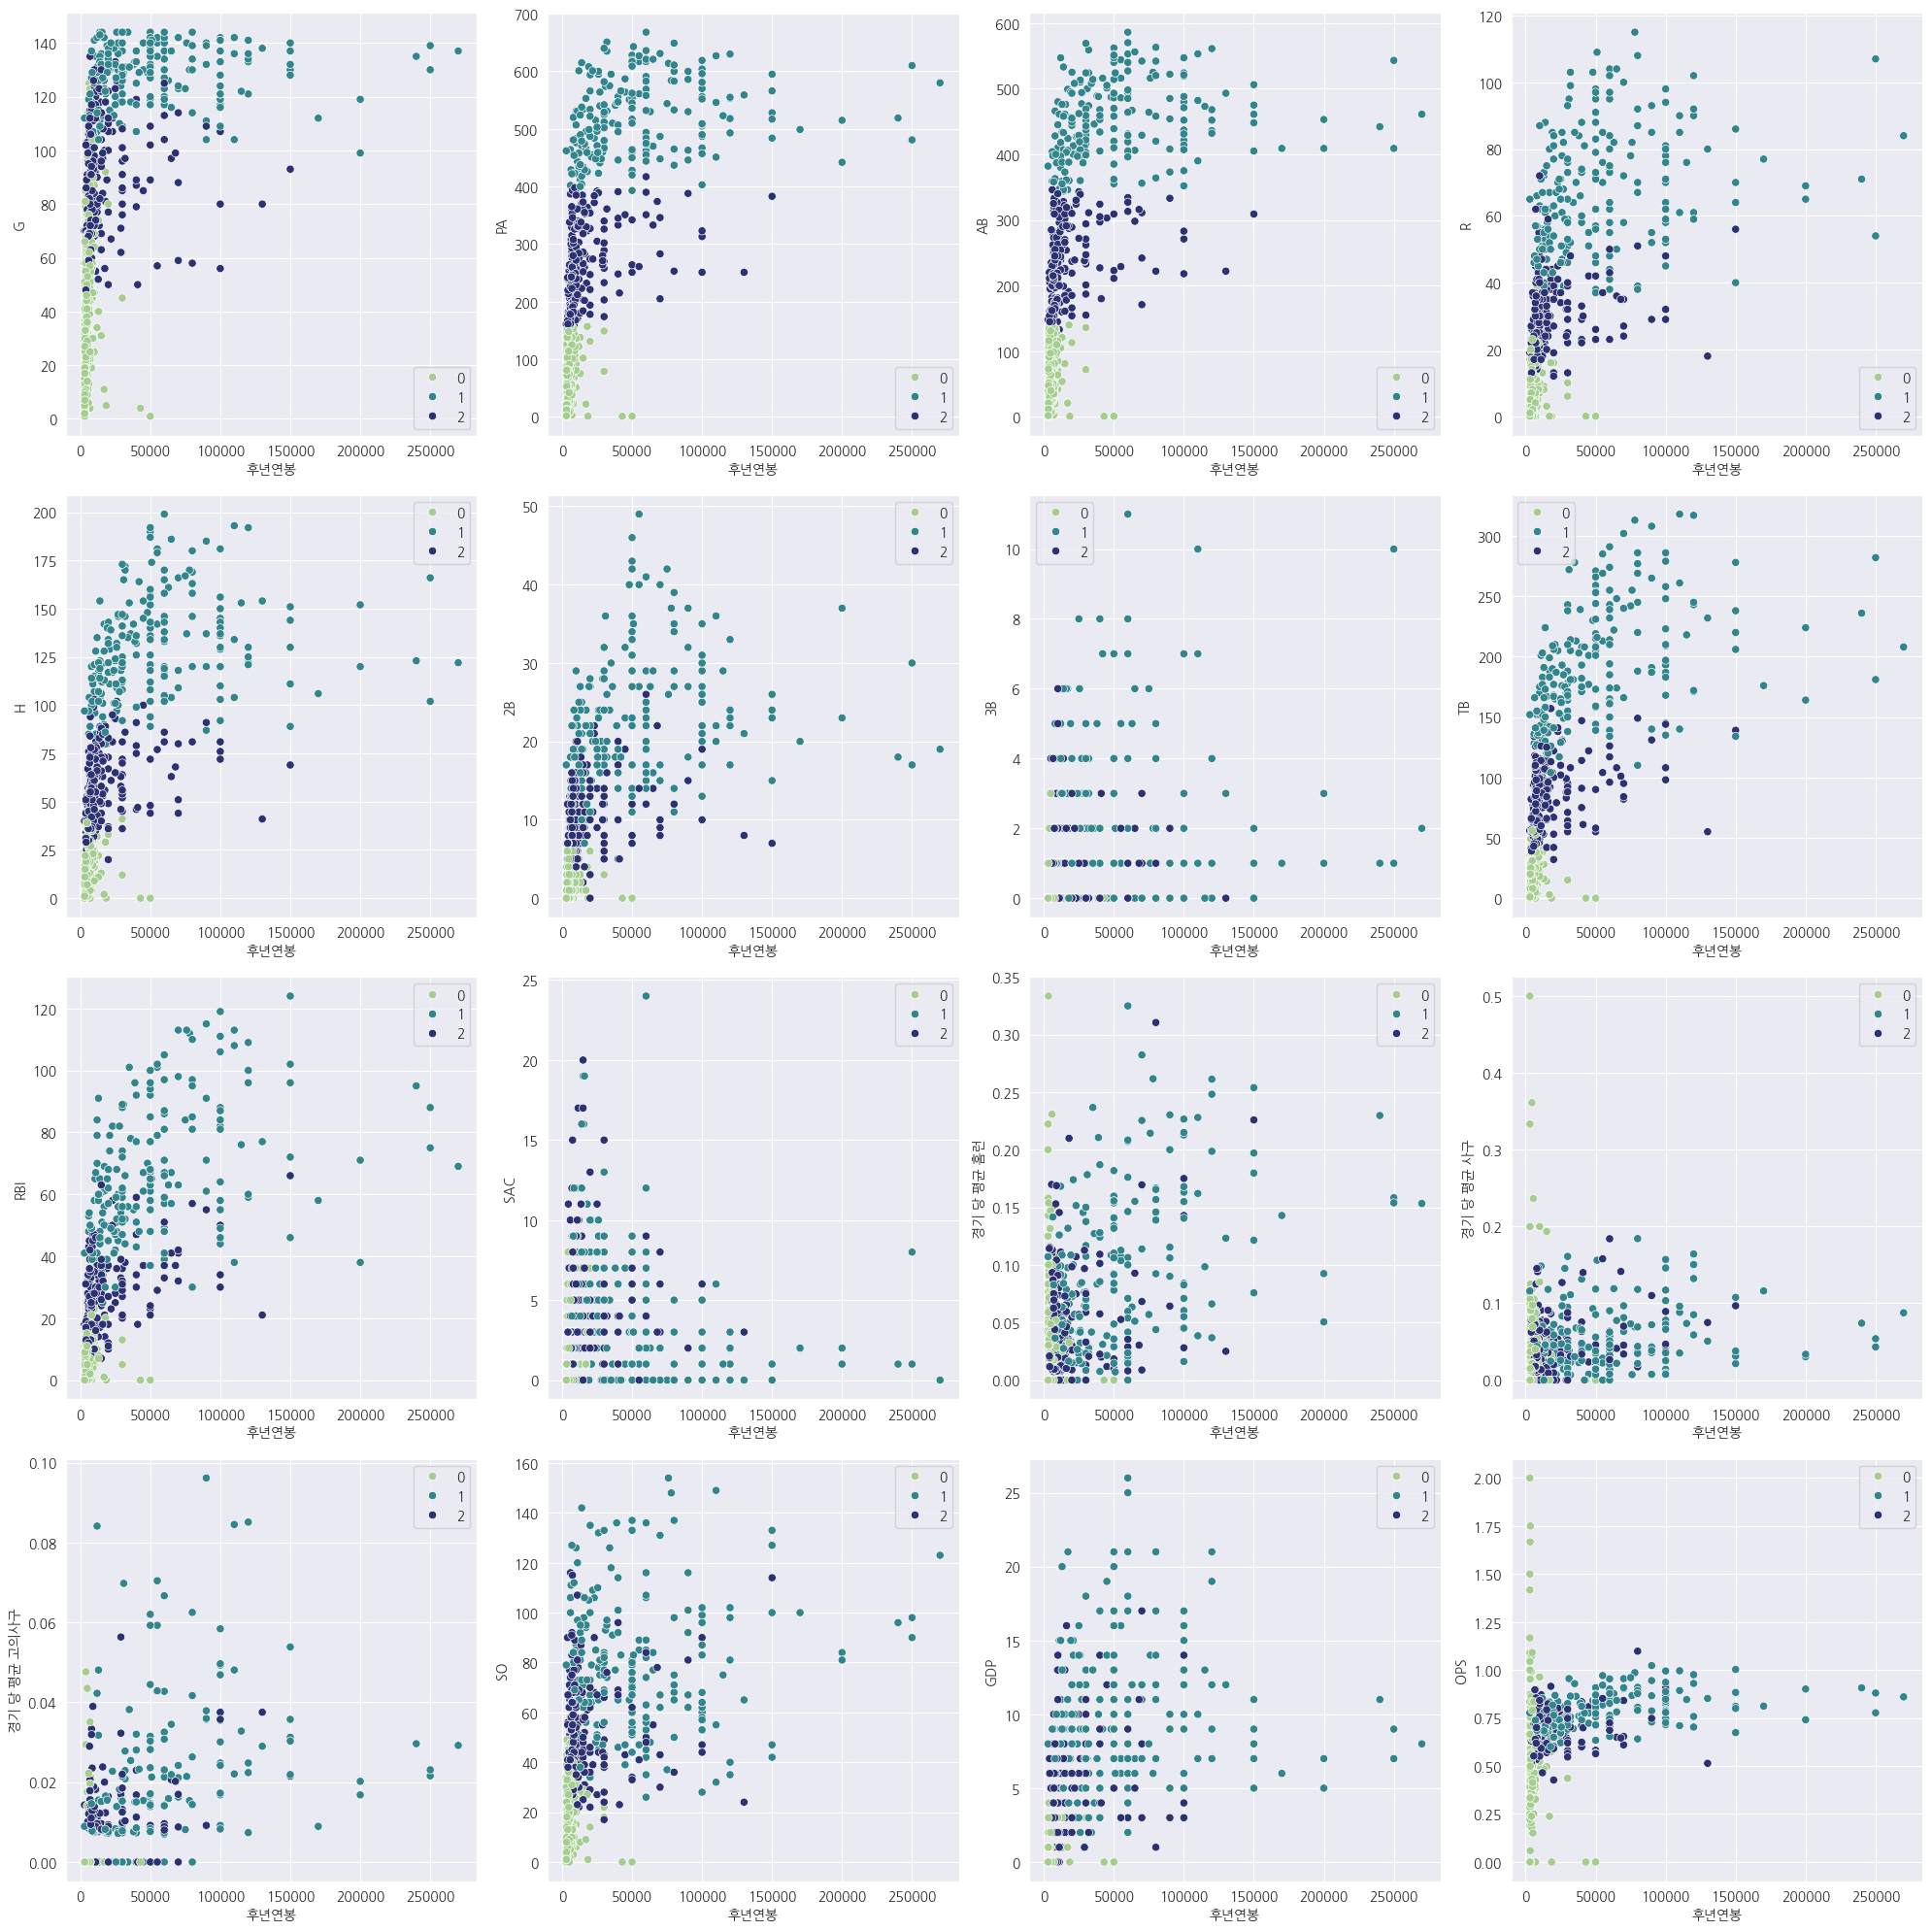

In [ ]:
col_n = 4
row_n = 4
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))

df_hitter['경기 당 평균 홈런'] = df_hitter['HR'] /df_hitter['G']
df_hitter['경기 당 평균 사구'] = df_hitter['HBP'] /df_hitter['G']
df_hitter['경기 당 평균 고의사구'] = df_hitter['IBB'] /df_hitter['G']



df_eda = df_hitter[['G','PA','AB','R','H','2B','3B','TB','RBI','SAC','경기 당 평균 홈런','경기 당 평균 사구','경기 당 평균 고의사구','SO','GDP','OPS','후년연봉']]

for i, col in enumerate(df_eda.columns[:-1]):
  sns.scatterplot(x=df_hitter['후년연봉'], y=df_hitter[col], data=df_hitter, hue=kmeans.labels_, palette='crest', ax=ax[int(i/col_n), int(i%col_n)])

plt.tight_layout()


In [ ]:
df_hitter[df_hitter['cluster_label'] == 0]

,선수명,팀명,AVG,G,PA,AB,R,H,2B,3B,...,연도,연봉(만원),WAR,후년연봉,cluster_label,타석 당 평균 볼넷,타석 당 평균 홈런,경기 당 평균 홈런,경기 당 평균 사구,경기 당 평균 고의사구
13,황대인,KIA,0.276,63,138,116,14,32,4,0,...,2020,3000.0,0.75,4300.0,0,0.152174,0.063492,0.063492,0.000000,0.0
14,오선우,KIA,0.239,59,73,67,11,16,0,0,...,2020,3000.0,0.02,3400.0,0,0.041096,0.067797,0.067797,0.050847,0.0
15,이우성,KIA,0.203,48,67,59,5,12,1,0,...,2020,4000.0,-0.23,4100.0,0,0.089552,0.000000,0.000000,0.041667,0.0
16,홍종표,KIA,0.250,40,88,80,7,20,3,0,...,2020,2700.0,-0.09,3300.0,0,0.045455,0.000000,0.000000,0.000000,0.0
17,최정용,KIA,0.196,38,59,56,5,11,1,0,...,2020,3600.0,-0.45,3800.0,0,0.033898,0.026316,0.026316,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,유로결,한화,0.146,27,53,48,5,7,1,0,...,2023,3300.0,-0.45,3300.0,0,0.018868,0.000000,0.000000,0.037037,0.0
814,하주석,한화,0.114,25,38,35,4,4,1,0,...,2023,10000.0,-0.58,7000.0,0,0.052632,0.000000,0.000000,0.040000,0.0
815,이명기,한화,0.175,14,42,40,2,7,1,0,...,2023,5000.0,-0.29,5000.0,0,0.047619,0.000000,0.000000,0.000000,0.0
816,김건,한화,0.167,7,12,12,1,2,0,0,...,2023,3100.0,-0.35,3200.0,0,0.000000,0.000000,0.000000,0.000000,0.0


IndexError: index 2 is out of bounds for axis 1 with size 2

<Figure size 2000x600 with 0 Axes>

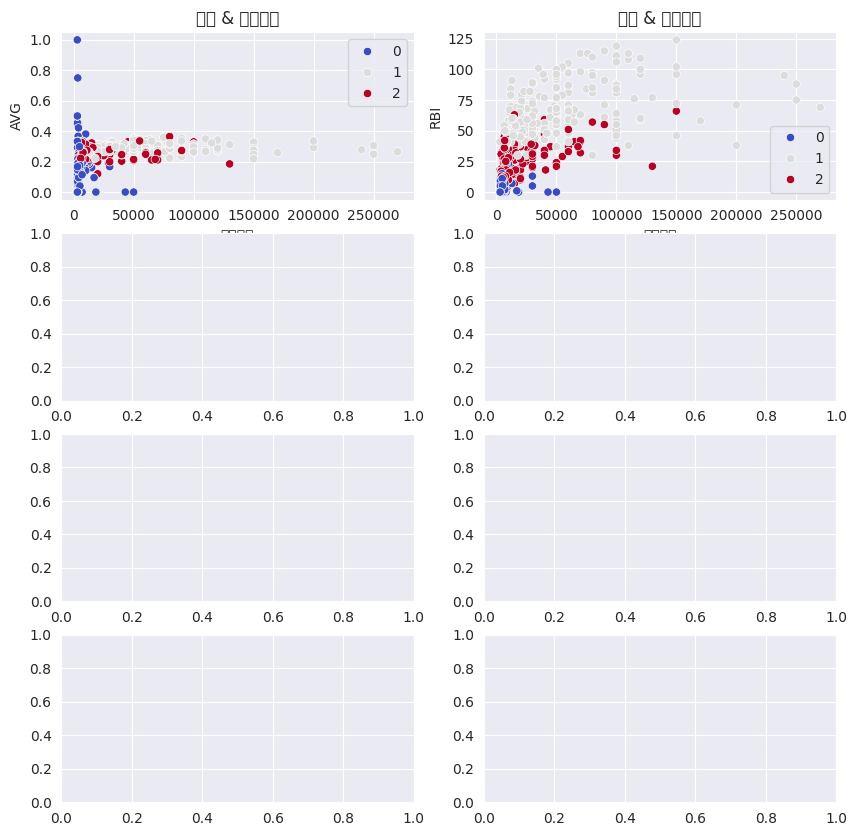

In [ ]:
plt.figure(figsize=(20, 6))
fig, ax = plt.subplots(4, 2, figsize=(10, 10))


sns.scatterplot(x=df_hitter['후년연봉'], y=df_hitter['AVG'], data=df_hitter, hue=kmeans.labels_, palette='coolwarm', ax=ax[0, 0])
ax[0, 0].set_title('타율 & 후년연봉')

sns.scatterplot(x=df_hitter['후년연봉'], y=df_hitter['RBI'], data=df_hitter, hue=kmeans.labels_, palette='coolwarm', ax=ax[0, 1])
ax[0, 1].set_title('타점 & 후년연봉')

sns.scatterplot(x=df_cluster['후년연봉'],y=df_cluster['SLG'], data=df_cluster, hue=kmeans.labels_, palette='coolwarm', ax=ax[0, 2])
ax[0, 2].set_title('장타율 & 후년연봉')


sns.scatterplot(x=df_cluster['후년연봉'],y=df_cluster['OPS'],  data=df_cluster, hue=kmeans.labels_, palette='coolwarm', ax=ax[0, 3])
ax[0, 3].set_title('출루율+장타율 & 후년연봉')


sns.scatterplot(x=df_cluster['후년연봉'],y=df_cluster['OPS'],  data=df_cluster, hue=kmeans.labels_, palette='coolwarm', ax=ax[0, 3])
ax[0, 3].set_title('출루율+장타율 & 후년연봉')


sns.scatterplot(x=df_cluster['후년연봉'],y=df_cluster['OPS'],  data=df_cluster, hue=kmeans.labels_, palette='coolwarm', ax=ax[0, 3])
ax[0, 3].set_title('출루율+장타율 & 후년연봉')


In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.scatterplot(x=df_cluster['연봉상승률'], y=df_hitter['AVG'], data=df_hitter, hue=kmeans.labels_, palette='coolwarm')
# plt.ylim([0.2, 0.4])

plt.subplot(132)
sns.scatterplot(x=df_cluster['연봉상승률'], y=df_hitter['RBI'], data=df_hitter, hue=kmeans.labels_, palette='coolwarm')

plt.subplot(133)
sns.scatterplot(y=df_cluster['HR'], x=df_cluster['연봉상승률'], data=df_cluster, hue=kmeans.labels_, palette='coolwarm')

In [ ]:
df_hitter.loc[df_hitter['후년연봉'] < df_hitter['연봉(만원)']]

In [ ]:
sw.loc[sw['선수'] == '최재훈']

### 4.3.2 cluster label 1의 특징 확인

In [ ]:
plt.figure(figsize=(20, 6))
df_cluster1 = df_cluster.loc[df_cluster['cluster_label']==1]

plt.subplot(131)
sns.scatterplot(x=df_cluster1['TB'], y=df_cluster1['AVG'], data=df_cluster1,color='gray')
plt.title('루타 & 타율')


plt.subplot(132)
sns.scatterplot(x=df_cluster1['RBI'], y=df_cluster1['OPS'], data=df_cluster1,color='gray')
plt.title('타점 & 출루율+장타율')

plt.subplot(133)
sns.scatterplot(x=df_cluster1['RISP'], y=df_cluster1['OBP'], data=df_cluster1,color='gray')
plt.title('득점권타율 & 출루율')

plt.subplot(133)
sns.scatterplot(x=df_cluster1['RISP'], y=df_cluster1['OBP'], data=df_cluster1,color='gray')
plt.title('득점권타율 & 출루율')

**루타도 많고 타율도 높은 편 --> 잘하는 선수 군집인가?**

In [ ]:
df_cluster1

In [ ]:
plt.figure(figsize=(20, 6))


df_cluster1 = df_cluster.loc[df_cluster['cluster_label']==1]

plt.subplot(131)
sns.scatterplot(x=df_cluster1['후년연봉'], y=df_cluster1['RBI'], data=df_cluster1,color='gray')
plt.title('연봉 & 타점')

plt.subplot(132)
sns.scatterplot(x=df_cluster1['후년연봉'], y=df_cluster1['OBP'], data=df_cluster1,color='gray')
plt.title('연봉 & 출루율+장타율')

plt.subplot(133)
sns.scatterplot(x=df_cluster1['후년연봉'], y=df_cluster1['PA'], data=df_cluster1,color='gray')
plt.title('연봉 & 타석')


In [ ]:
plt.figure(figsize=(20, 6))


# plt.subplot(131)
# sns.scatterplot(x=df_cluster1['연봉상승률'], y=df_cluster1['RBI'], data=df_cluster1,color='gray')
# plt.title('연봉상승률 & 타점')
# #plt.xlim([-1,1])

plt.subplot(132)
sns.scatterplot(x=df_cluster1['연봉상승률'], y=df_cluster1['AVG'], data=df_cluster1,color='gray')
plt.title('연봉 & 출루율+장타율')
plt.xlim([-1,1])

plt.subplot(133)
sns.scatterplot(x=df_cluster1['연봉상승률'], y=df_cluster1['HR'], data=df_cluster1
                ,color='gray')
plt.title('연봉상승률 & 홈런')
#plt.xlim([-1,1])


### 4.3.3 cluster 0의 특징 확인

In [ ]:
plt.figure(figsize=(20, 6))

df_cluster0 = df_cluster.loc[df_cluster['cluster_label']==0]


plt.subplot(131)
sns.scatterplot(x=df_cluster0['TB'], y=df_cluster0['AVG'], data=df_cluster0,color='darkblue')
plt.title('루타 & 타율')

plt.subplot(132)
df_cluster1 = df_hitter.loc[df_hitter['cluster_label']==1]
sns.scatterplot(x=df_cluster0['RBI'], y=df_cluster0['OPS'], data=df_cluster0,color='darkblue')
plt.title('타점 & 출루율+장타율')

plt.subplot(133)
df_cluster1 = df_hitter.loc[df_hitter['cluster_label']==1]
sns.scatterplot(x=df_cluster0['RISP'], y=df_cluster0['OBP'], data=df_cluster0,color='darkblue')
plt.title('득점권타율 & 출루율')


In [ ]:
plt.figure(figsize=(20, 6))


plt.subplot(131)
sns.scatterplot(x=df_cluster0['후년연봉'], y=df_cluster0['RBI'], data=df_cluster0,color='darkblue')
plt.title('연봉 & 타점')

plt.subplot(132)
sns.scatterplot(x=df_cluster0['후년연봉'], y=df_cluster0['OBP'], data=df_cluster0,color='darkblue')
plt.title('연봉 & 출루율+장타율')

plt.subplot(133)
sns.scatterplot(x=df_cluster0['후년연봉'], y=df_cluster0['PA'], data=df_cluster0,color='darkblue')
plt.title('연봉 & 타석')


In [ ]:
plt.figure(figsize=(20, 6))


plt.subplot(131)
sns.scatterplot(x=df_cluster0['연봉상승률'], y=df_cluster0['RBI'], data=df_cluster0,color='darkblue')
plt.title('연봉상승률 & 타점')
# plt.xlim([-1,1])

plt.subplot(132)
sns.scatterplot(x=df_cluster0['연봉상승률'], y=df_cluster0['AVG'], data=df_cluster0,color='darkblue')
plt.title('연봉상승률과 타율')
# plt.xlim([-1,1])

plt.subplot(133)
sns.scatterplot(x=df_cluster0['연봉상승률'], y=df_cluster0['RISP'], data=df_cluster0,color='darkblue')
plt.title('연봉 & 타석')
plt.xlim([-1,1])


연봉이 높은 사람은 잘하고 있으나, 잘하는 사람이 연봉을 많이 받고 있지는 않다  
하지만 잘하지 못하는 사람은 연봉을 적게 받고 있다

# 5. 모델링